# Supervised Learning with scikit-learn (Logistic Regression)

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Ignoring future warnings for readability reasons
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Importing the course datasets 
diabetes_df = pd.read_csv('datasets/diabetes_clean.csv')
music = pd.read_csv('datasets/music_clean.csv')
advertising = pd.read_csv('datasets/advertising_and_sales_clean.csv')

# Logistic Regression and the ROC curve

## Fitting Logistic Regressions with scikit learn

In this use case, the probability of having diabetes is predicted by training a logistic regression model. The threshold for predicting someone having diabetes is set by 0.5 by defaukt in scikit learn.

In [72]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict values
y_pred_values = logreg.predict(X_test)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]

print(y_pred_probs[:10])
print(y_pred_values[:10])

[0.27550928 0.1948644  0.1166111  0.16451717 0.46144283 0.43296294
 0.01624534 0.64877747 0.54182916 0.76164325]
[0 0 0 0 0 0 0 1 1 1]


## Computing and visualizing the ROC curve

The ROC (receiver operating characteristic) curve shows the true positve rate on the y-axis and the false positive rate on the x-axis. The diagonal visualizies the axis, when the variable are indistinguishable by the features, i.e. the chance model which randomly guesses labels.

If p = 0 (upper right corner) the model predics all values as positive (1), i.e. all positives are correctly predicted (true positive) but the false positive rate is also at its maximum because the model predicts also all negatives wrongly as positive.

More precisely, since each probability is predicted > 0, all observations are predicted as beeing positive (1), in the case of diabetes, all observations are predicted having diabetes.

If the threshold equals 1, then all observations are predicted negative (0), i.e. all positives are wrongly predicted as negative (false negative) and all negatives are predicted correctly as negative (0).

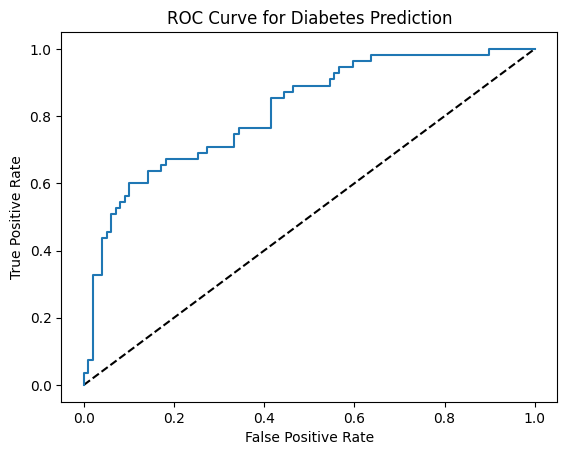

In [73]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

# ROC AUC

The ROC AUC is the area under the ROC curve

In [74]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8150596877869605
[[81 18]
 [24 31]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



# Hyperparameter tuning

# GridSearchCV

GridsearchCV trains the models for each hyperparameter along the pre-defined grid and is therefore computationally intensive. In scikitlearn, GridSearchCV is implemented in the model_selection module.

In [75]:
# Split diabetes data

X = diabetes_df.drop("diabetes", axis = 1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train Lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

The following GridSearch uses the Lasso model and searches for the best model by training and testing a model for 20 different values of alpha between 0.00001 and 20. 

In [76]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Defining kfolds for cross-validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)

print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 0.15790315789473686}
Tuned lasso score: 0.2680563190579576


# RandomizedSearchCV